[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#7E6148FF"

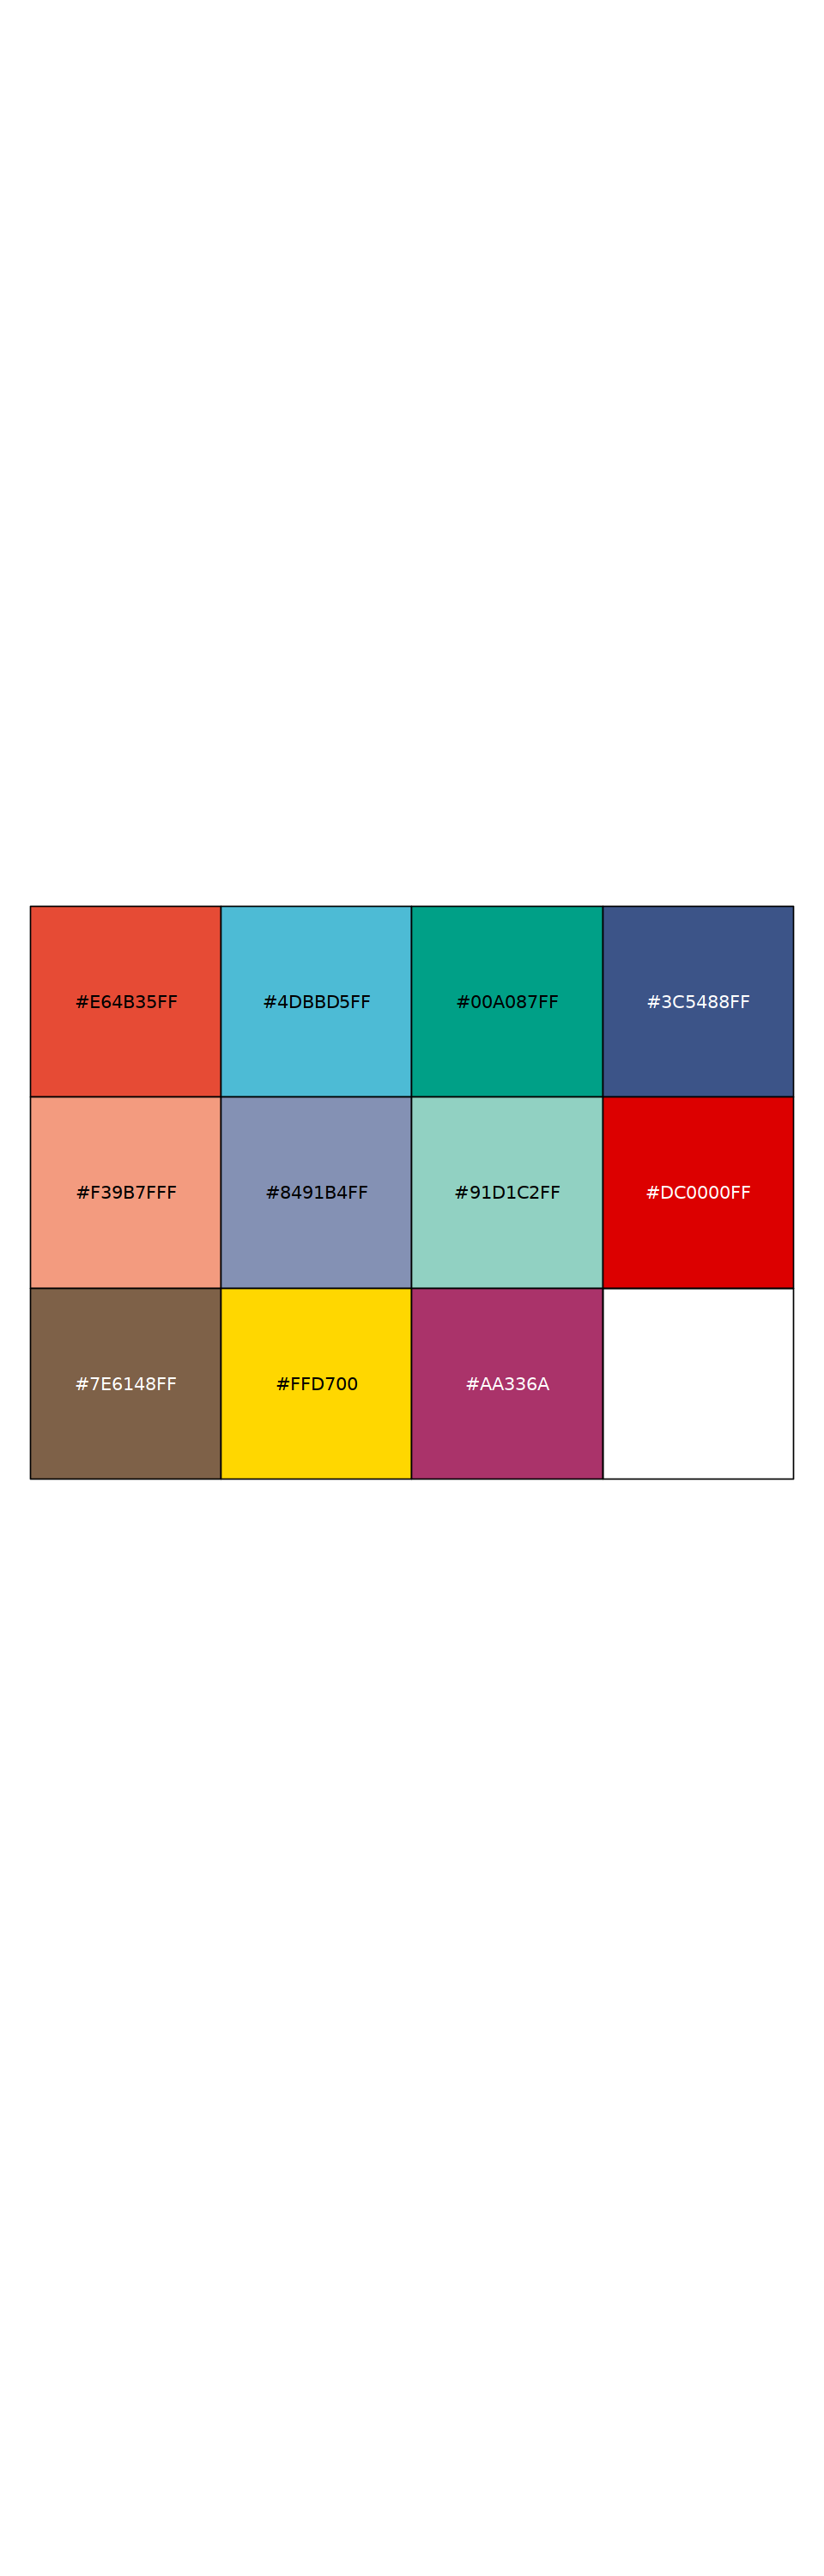

In [46]:
library(tidyverse)

options(scipen=999)

library(cowplot)

library(patchwork)
library(ggsci)

pal_npg("nrc")(9)

color_pal = readRDS("../results/methods_color_pal.rds")
shape_pal = c(15, 17, 3)
names(shape_pal) = c('O2O', 'HE', 'SH')

library(viridis)
library(scales)

show_col(color_pal)

library(ggpubr)
library(gtable)
library(scales)
library(gridExtra)
library(grid)

text_sizes <- theme(axis.text.x=element_text(size=7,colour="black"),
                      axis.text.y=element_text(size=7,colour="black"),
                      axis.title.y=element_text(size=8,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b =2, unit = "pt")),
                      axis.title.x=element_text(size=8,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b = 2, unit = "pt")),
                      legend.text = element_text(size=7,colour="black"),
                      legend.title = element_text(size=8,colour="black", margin = margin(t = 5, l = 0, r = 0, b = 5, unit = "pt")),
                      legend.key = element_rect(colour="transparent", fill = "transparent"),
                      strip.text.x = element_text(size=8,color = 'black',face="bold", angle=0),
                      strip.text.y = element_text(size=8,color = 'black', face="bold", angle=0, vjust=0.5, hjust=0),
                      axis.ticks= element_line(color = 'black', size=0.2),
                      axis.line = element_line(colour = "black", size = 0.2, linetype = "solid"),
                      plot.margin=unit(c(2,2,2,2),"pt"),
                      plot.title=element_text(size=10, face="bold", colour="black"))

common_minimal <- text_sizes + theme(
        plot.background = element_rect(fill = NA,colour = NA),
        strip.background = element_rect(fill = NA,colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) + theme(
    legend.spacing = unit(0.8, 'lines'), 
    legend.key.size = unit(0.8, "lines"))  +
    theme(legend.spacing.y = unit(10, 'pt'),
    legend.text = element_text(margin = margin(t = 7)))


# commonly used, x axis text 45 degree
common_0x <- common_minimal + theme(axis.text.x = element_text(angle=0))
common_45x <- common_minimal + theme(axis.text.x = element_text(angle=45, hjust = 1))

In [47]:
species_order = c("hsapiens", "mmulatta", "mfascicularis", "mmusculus", "xlaevis", "xtropicalis", "drerio")

In [48]:
color_pal

fastMNN       Harmony         LIGER   LIGER UINMF         SAMap 
  "#E64B35FF"   "#4DBBD5FF"   "#00A087FF"   "#3C5488FF"   "#F39B7FFF" 
    Scanorama        scANVI          scVI  SeuratV4 CCA SeuratV4 RPCA 
  "#8491B4FF"   "#91D1C2FF"   "#DC0000FF"   "#7E6148FF"     "#FFD700" 
 unintegrated 
    "#AA336A"

In [49]:
sccaf <- read_csv("../results/sccaf_anno_transfer.csv")

Rows: 1776 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): integration_method, homology_method, species_dir, from_species, to_...
dbl (2): adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [50]:
head(sccaf)

integration_method,homology_method,species_dir,adj_rand_score,pct_cell_type_kept,from_species,to_species,task_name,type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
scANVI,O2O,sscrofa to hsapiens,0.9949846,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI O2O
scANVI,HE,sscrofa to hsapiens,0.9949007,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI HE
scANVI,SH,sscrofa to hsapiens,0.9943494,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI SH
scANVI,SH,mmulatta to hsapiens,0.9942026,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI SH
scANVI,HE,mmulatta to hsapiens,0.9933227,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI HE
scANVI,O2O,mmulatta to hsapiens,0.9932497,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI O2O


In [51]:
scores = read_csv("../results/all_tasks_metrics_scores_ranks.csv")

Rows: 480 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): type, integration_method_batch, homology_method_batch, integration...
dbl (39): PCR, iLISI, bASW, GC, kBET, bASW_scaled, GC_scaled, kBET_scaled, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
head(scores)

type,PCR,iLISI,bASW,GC,kBET,integration_method_batch,homology_method_batch,bASW_scaled,GC_scaled,⋯,ARI_scaled_rank,cASW_scaled_rank,iso_F1_scaled_rank,avg_score_scaled_rank_bio,integrated_score,integrated_score_rank,task_name,trajectory_conservation_score_batch,traj_scaled,traj_scaled_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
scANVI SH,0.007285071,0.1526515,0.9057237,0.9599731,0.4512883,scANVI,SH,0.9763774,0.9232030,⋯,2,3,3,1,0.9411889,1,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA HE,0.003919923,0.1640826,0.8572452,0.9572954,0.4768689,SeuratV4 RPCA,HE,0.8535639,0.9141284,⋯,4,4,13,4,0.9128699,2,Pancreas_hs_mm,NA,NA,NA
scANVI O2O,0.007466040,0.1406177,0.9019474,0.9603564,0.4726367,scANVI,O2O,0.9668107,0.9245017,⋯,1,10,17,7,0.9114365,3,Pancreas_hs_mm,NA,NA,NA
scANVI HE,0.006817178,0.1539172,0.9025827,0.9462154,0.4998071,scANVI,HE,0.9684200,0.8765788,⋯,3,11,18,8,0.9079349,4,Pancreas_hs_mm,NA,NA,NA
SeuratV4 CCA HE,0.001992488,0.1551500,0.8406176,0.9538206,0.4568441,SeuratV4 CCA,HE,0.8114402,0.9023525,⋯,12,1,6,3,0.9077140,5,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA SH,0.003728794,0.1140756,0.8571635,0.9178169,0.4904657,SeuratV4 RPCA,SH,0.8533570,0.7803383,⋯,5,5,16,5,0.9010601,6,Pancreas_hs_mm,NA,NA,NA


In [53]:
levels(factor(scores$task_name))

[1] "Embryo_dr_xt"         "Heart_hs_dr"          "Heart_hs_mf"         
 [4] "Heart_hs_mf_mm"       "Heart_hs_mf_mm_xl"    "Heart_hs_mf_mm_xl_dr"
 [7] "Heart_hs_mm"          "Heart_hs_xl"          "Heart_mf_dr"         
[10] "Heart_mf_mm"          "Heart_mf_xl"          "Heart_mm_dr"         
[13] "Heart_mm_xl"          "Heart_xl_dr"          "Hippocampus_hs_mu_ss"
[16] "Pancreas_hs_mm"

In [54]:
scores = scores %>% mutate(homology_method_batch = gsub("one2one only", "O2O", homology_method_batch)) %>% 
mutate(homology_method_batch = gsub("higher expression", "HE", homology_method_batch)) %>% 
mutate(homology_method_batch = gsub("stronger homology", "SH", homology_method_batch)) %>% 
mutate(type = paste(integration_method_batch, homology_method_batch))

In [55]:
head(scores)

type,PCR,iLISI,bASW,GC,kBET,integration_method_batch,homology_method_batch,bASW_scaled,GC_scaled,⋯,ARI_scaled_rank,cASW_scaled_rank,iso_F1_scaled_rank,avg_score_scaled_rank_bio,integrated_score,integrated_score_rank,task_name,trajectory_conservation_score_batch,traj_scaled,traj_scaled_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
scANVI SH,0.007285071,0.1526515,0.9057237,0.9599731,0.4512883,scANVI,SH,0.9763774,0.9232030,⋯,2,3,3,1,0.9411889,1,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA HE,0.003919923,0.1640826,0.8572452,0.9572954,0.4768689,SeuratV4 RPCA,HE,0.8535639,0.9141284,⋯,4,4,13,4,0.9128699,2,Pancreas_hs_mm,NA,NA,NA
scANVI O2O,0.007466040,0.1406177,0.9019474,0.9603564,0.4726367,scANVI,O2O,0.9668107,0.9245017,⋯,1,10,17,7,0.9114365,3,Pancreas_hs_mm,NA,NA,NA
scANVI HE,0.006817178,0.1539172,0.9025827,0.9462154,0.4998071,scANVI,HE,0.9684200,0.8765788,⋯,3,11,18,8,0.9079349,4,Pancreas_hs_mm,NA,NA,NA
SeuratV4 CCA HE,0.001992488,0.1551500,0.8406176,0.9538206,0.4568441,SeuratV4 CCA,HE,0.8114402,0.9023525,⋯,12,1,6,3,0.9077140,5,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA SH,0.003728794,0.1140756,0.8571635,0.9178169,0.4904657,SeuratV4 RPCA,SH,0.8533570,0.7803383,⋯,5,5,16,5,0.9010601,6,Pancreas_hs_mm,NA,NA,NA


In [56]:
scores$task_name= gsub("hsapiens", "hs", scores$task_name)
scores$task_name= gsub("mfascicularis", "mf", scores$task_name)
scores$task_name= gsub("mmusculus", "mm", scores$task_name)
scores$task_name= gsub("xtropicalis", "xl", scores$task_name)
scores$task_name= gsub("drerio", "dr", scores$task_name)
scores$task_name= gsub("dmelanogaster", "dm", scores$task_name)

In [57]:
head(sccaf)

integration_method,homology_method,species_dir,adj_rand_score,pct_cell_type_kept,from_species,to_species,task_name,type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
scANVI,O2O,sscrofa to hsapiens,0.9949846,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI O2O
scANVI,HE,sscrofa to hsapiens,0.9949007,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI HE
scANVI,SH,sscrofa to hsapiens,0.9943494,0.9090909,sscrofa,hsapiens,Hippocampus_hs_mu_ss,scANVI SH
scANVI,SH,mmulatta to hsapiens,0.9942026,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI SH
scANVI,HE,mmulatta to hsapiens,0.9933227,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI HE
scANVI,O2O,mmulatta to hsapiens,0.9932497,1.0000000,mmulatta,hsapiens,Hippocampus_hs_mu_ss,scANVI O2O


In [58]:
levels(factor(sccaf$task_name))
levels(factor(sccaf$type))

[1] "Embryo_dr_xt"         "Heart_hs_dr"          "Heart_hs_mf"         
 [4] "Heart_hs_mf_mm"       "Heart_hs_mf_mm_xl"    "Heart_hs_mf_mm_xl_dr"
 [7] "Heart_hs_mm"          "Heart_hs_xl"          "Heart_mf_dr"         
[10] "Heart_mf_mm"          "Heart_mf_xl"          "Heart_mm_dr"         
[13] "Hippocampus_hs_mu_ss" "Pancreas_hs_mm"

[1] "fastMNN HE"        "fastMNN O2O"       "fastMNN SH"       
 [4] "Harmony HE"        "Harmony O2O"       "Harmony SH"       
 [7] "LIGER HE"          "LIGER O2O"         "LIGER SH"         
[10] "LIGER UINMF HE"    "LIGER UINMF O2O"   "LIGER UINMF SH"   
[13] "Scanorama HE"      "Scanorama O2O"     "Scanorama SH"     
[16] "scANVI HE"         "scANVI O2O"        "scANVI SH"        
[19] "scVI HE"           "scVI O2O"          "scVI SH"          
[22] "SeuratV4 CCA HE"   "SeuratV4 CCA O2O"  "SeuratV4 CCA SH"  
[25] "SeuratV4 RPCA HE"  "SeuratV4 RPCA O2O" "SeuratV4 RPCA SH" 
[28] "unintegrated HE"   "unintegrated O2O"  "unintegrated SH"

In [59]:
head(scores)

type,PCR,iLISI,bASW,GC,kBET,integration_method_batch,homology_method_batch,bASW_scaled,GC_scaled,⋯,ARI_scaled_rank,cASW_scaled_rank,iso_F1_scaled_rank,avg_score_scaled_rank_bio,integrated_score,integrated_score_rank,task_name,trajectory_conservation_score_batch,traj_scaled,traj_scaled_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
scANVI SH,0.007285071,0.1526515,0.9057237,0.9599731,0.4512883,scANVI,SH,0.9763774,0.9232030,⋯,2,3,3,1,0.9411889,1,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA HE,0.003919923,0.1640826,0.8572452,0.9572954,0.4768689,SeuratV4 RPCA,HE,0.8535639,0.9141284,⋯,4,4,13,4,0.9128699,2,Pancreas_hs_mm,NA,NA,NA
scANVI O2O,0.007466040,0.1406177,0.9019474,0.9603564,0.4726367,scANVI,O2O,0.9668107,0.9245017,⋯,1,10,17,7,0.9114365,3,Pancreas_hs_mm,NA,NA,NA
scANVI HE,0.006817178,0.1539172,0.9025827,0.9462154,0.4998071,scANVI,HE,0.9684200,0.8765788,⋯,3,11,18,8,0.9079349,4,Pancreas_hs_mm,NA,NA,NA
SeuratV4 CCA HE,0.001992488,0.1551500,0.8406176,0.9538206,0.4568441,SeuratV4 CCA,HE,0.8114402,0.9023525,⋯,12,1,6,3,0.9077140,5,Pancreas_hs_mm,NA,NA,NA
SeuratV4 RPCA SH,0.003728794,0.1140756,0.8571635,0.9178169,0.4904657,SeuratV4 RPCA,SH,0.8533570,0.7803383,⋯,5,5,16,5,0.9010601,6,Pancreas_hs_mm,NA,NA,NA


In [60]:
levels(factor(scores$task_name))
levels(factor(scores$type))

[1] "Embryo_dr_xt"         "Heart_hs_dr"          "Heart_hs_mf"         
 [4] "Heart_hs_mf_mm"       "Heart_hs_mf_mm_xl"    "Heart_hs_mf_mm_xl_dr"
 [7] "Heart_hs_mm"          "Heart_hs_xl"          "Heart_mf_dr"         
[10] "Heart_mf_mm"          "Heart_mf_xl"          "Heart_mm_dr"         
[13] "Heart_mm_xl"          "Heart_xl_dr"          "Hippocampus_hs_mu_ss"
[16] "Pancreas_hs_mm"

[1] "fastMNN HE"        "fastMNN O2O"       "fastMNN SH"       
 [4] "Harmony HE"        "Harmony O2O"       "Harmony SH"       
 [7] "LIGER HE"          "LIGER O2O"         "LIGER SH"         
[10] "LIGER UINMF HE"    "LIGER UINMF O2O"   "LIGER UINMF SH"   
[13] "Scanorama HE"      "Scanorama O2O"     "Scanorama SH"     
[16] "scANVI HE"         "scANVI O2O"        "scANVI SH"        
[19] "scVI HE"           "scVI O2O"          "scVI SH"          
[22] "SeuratV4 CCA HE"   "SeuratV4 CCA O2O"  "SeuratV4 CCA SH"  
[25] "SeuratV4 RPCA HE"  "SeuratV4 RPCA O2O" "SeuratV4 RPCA SH" 
[28] "unintegrated HE"   "unintegrated O2O"  "unintegrated SH"

In [61]:
sccaf_avg = sccaf %>% group_by(task_name, type) %>% mutate(avg_ari = mean(adj_rand_score)) %>% 
select(type, avg_ari) %>% unique()

Adding missing grouping variables: `task_name`


In [62]:
head(sccaf_avg)

task_name,type,avg_ari
<chr>,<chr>,<dbl>
Hippocampus_hs_mu_ss,scANVI O2O,0.9685144
Hippocampus_hs_mu_ss,scANVI HE,0.9673995
Hippocampus_hs_mu_ss,scANVI SH,0.9693822
Hippocampus_hs_mu_ss,fastMNN HE,0.9617759
Pancreas_hs_mm,scANVI HE,0.9847153
Hippocampus_hs_mu_ss,fastMNN SH,0.9617260


In [82]:
tasks_seven = c("Pancreas_hs_mm", "Hippocampus_hs_mu_ss",  "Embryo_dr_xt", 'Heart_hs_mf', 'Heart_hs_mf_mm',
              'Heart_hs_mf_mm_xl', 'Heart_hs_mf_mm_xl_dr')

In [64]:
task_order = c('Pancreas_hs_mm', 'Hippocampus_hs_mu_ss', 'Embryo_dr_xt', 'Heart_hs_mf', 'Heart_hs_mm', 'Heart_hs_xl', 'Heart_hs_dr',
              'Heart_mf_mm', 'Heart_mf_xl', 'Heart_mf_dr', 'Heart_mm_xl', 'Heart_mm_dr', 'Heart_xl_dr', 'Heart_hs_mf_mm', 'Heart_hs_mf_mm_xl', 
              'Heart_hs_mf_mm_xl_dr'
)

In [65]:
options(repr.plot.width = 7, repr.plot.height = 30)

In [66]:
merge(scores, sccaf_avg, by = c('type', 'task_name'), all.x = F,all.y = T) %>% summary()

     type            task_name              PCR               iLISI        
 Length:393         Length:393         Min.   :0.001043   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:0.018877   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :0.042067   Median :0.01554  
                                       Mean   :0.061632   Mean   :0.06383  
                                       3rd Qu.:0.083438   3rd Qu.:0.09652  
                                       Max.   :0.308012   Max.   :0.40361  
                                                                           
      bASW              GC              kBET           integration_method_batch
 Min.   :0.4611   Min.   :0.4549   Min.   :0.0004777   Length:393              
 1st Qu.:0.6987   1st Qu.:0.8293   1st Qu.:0.1118153   Class :character        
 Median :0.7834   Median :0.9036   Median :0.1820322   Mode  :character        
 Mean   :0.7595   Mean   :0.8764   Mean   :0.1997496                    

In [67]:
task_order = c('Pancreas_hs_mm', 'Hippocampus_hs_mu_ss', 'Embryo_dr_xt', 'Heart_hs_mf', 'Heart_hs_mm', 'Heart_hs_xl', 'Heart_hs_dr',
              'Heart_mf_mm', 'Heart_mf_xl', 'Heart_mf_dr', 'Heart_mm_xl', 'Heart_mm_dr', 'Heart_xl_dr', 'Heart_hs_mf_mm', 'Heart_hs_mf_mm_xl', 
              'Heart_hs_mf_mm_xl_dr'
)

In [ ]:
merge(scores, sccaf_avg, by = c('type', 'task_name'), all.x = F,all.y = T)$homology_method_bio

[1] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
 [13] "HE"  "HE"  "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O"
 [25] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
 [37] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
 [49] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "O2O" "O2O" "O2O" "O2O"
 [61] "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "SH"  "SH" 
 [73] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
 [85] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
 [97] "HE"  "HE"  "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O"
[109] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[121] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[133] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "O2O" "O2O" "O2O" "O2O"
[145] "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "SH"  "SH" 
[157] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[169] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[181] "HE"  "HE"  "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O"
[193] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[205] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[217] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "O2O" "O2O" "O2O" "O2O"
[229] "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "SH"  "SH" 
[241] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[253] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[265] "HE"  "HE"  "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O"
[277] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[289] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[301] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "O2O" "O2O" "O2O" "O2O"
[313] "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "SH"  "SH" 
[325] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[337] "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE"  "HE" 
[349] "HE"  "HE"  "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O" "O2O"
[361] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "SH" 
[373] "SH"  "SH"  "SH"  "SH"  "SH"  "SH"  "HE"  "HE"  "HE"  "HE"  "HE"  "O2O"
[385] "O2O" "O2O" "O2O" "O2O" "SH"  "SH"  "SH"  "SH"  "SH"

In [80]:
options(repr.plot.height = 4, repr.plot.width = 7)

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 13 rows containing missing values (geom_smooth).”


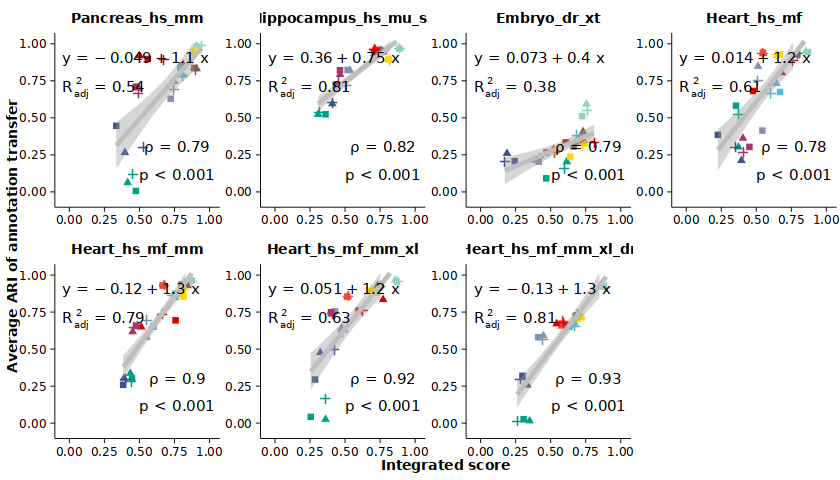

In [85]:
suppressWarnings(merge(scores, sccaf_avg, by = c('type', 'task_name'), all.x = F,all.y = T) %>% 
filter(task_name %in% tasks_seven) %>% 
ggplot(aes(x = integrated_score, y = avg_ari)) + 
geom_point(aes(color = integration_method_batch, shape = homology_method_batch)) +
stat_smooth(method = "lm", color='gray') +
stat_cor(digits = 2, method = 'spearman', p.accuracy = 0.001, r.accuracy = 0.01, size=3, label.x = 0.5, label.y = 0.2, cor.coef.name = 'rho', label.sep = "\n", ) +
scale_shape_manual(values = c(15,17,3)) +
scale_color_manual(values = color_pal) + common_0x +
theme(legend.position = 'none') +
  stat_regline_equation(label.y = 0.9, aes(label = ..eq.label..), size = 3) +
  stat_regline_equation(label.y = 0.7, aes(label = ..adj.rr.label..), size = 3) +
facet_wrap(.~factor(task_name, levels = tasks_seven), scales = 'free', nrow=2) +
labs(x = 'Integrated score', y = 'Average ARI of annotation transfer') +
scale_x_continuous(limits = c(-0.05, 1.02), breaks = c(0, 0.25, 0.5, 0.75, 1)) + 
scale_y_continuous(limits = c(-0.05, 1.02), breaks = c(0, 0.25, 0.5, 0.75, 1))+
scale_shape_manual(values = shape_pal))